In [1]:
library(ggplot2)
library(IRdisplay)
library(gridExtra)

MSE <- function(a, b) {
    usable <- !(is.na(a) | is.na(b))
    sum((a[usable] - b[usable])**2) / sum(usable)
}

MAE <- function(a, b) {
    usable <- !(is.na(a) | is.na(b))
    mean(abs(a[usable] - b[usable]))
}

In [2]:
read.file <- function(filename) {
    dataset <- read.csv(filename)
    dataset["id"] <- NULL
    dataset$class <- ifelse(dataset$class == 2, 0, 1)
    dataset$bare.nuclei <- as.numeric(as.character(dataset$bare.nuclei))
    dataset <- dataset[!is.na(dataset$bare.nuclei),]
    dataset
}

validation.dataset <- read.file("breastCancer_test.data")
train.dataset <- read.file("breastCancer_train.data")

table(train.dataset$class)
train.dataset

Warning message in read.file("breastCancer_test.data"):
“NAs introduced by coercion”Warning message in read.file("breastCancer_train.data"):
“NAs introduced by coercion”


  0   1 
353 190 

,clump.thickness,unif.cell.size,unif.cell.shape,marginal.adhesion,epithelial.cell.size,bare.nuclei,bland.chromatin,normal.nucleoli,mitoses,class
1,1,1,3,1,1,1,2,1,1,0
2,2,1,1,1,3,1,2,1,1,0
3,5,1,2,1,2,1,3,1,1,0
4,1,1,1,1,2,1,3,1,1,0
6,3,1,1,1,2,5,1,1,1,0
7,2,1,1,1,2,5,1,1,1,0
8,1,1,1,1,1,1,3,1,1,0
9,1,1,1,1,2,1,1,1,1,0
10,3,1,2,1,2,1,2,1,1,0
11,1,1,1,1,3,2,2,1,1,0


In [3]:
summary(train.dataset[train.dataset$class == 1,])

 clump.thickness  unif.cell.size   unif.cell.shape  marginal.adhesion
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   
 1st Qu.: 5.000   1st Qu.: 4.000   1st Qu.: 5.000   1st Qu.: 3.000   
 Median : 7.000   Median : 6.000   Median : 6.000   Median : 5.000   
 Mean   : 7.063   Mean   : 6.432   Mean   : 6.495   Mean   : 5.442   
 3rd Qu.:10.000   3rd Qu.:10.000   3rd Qu.: 8.750   3rd Qu.: 8.000   
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000   
 epithelial.cell.size  bare.nuclei     bland.chromatin normal.nucleoli 
 Min.   : 1.000       Min.   : 1.000   Min.   : 1.0    Min.   : 1.000  
 1st Qu.: 3.000       1st Qu.: 5.000   1st Qu.: 4.0    1st Qu.: 3.000  
 Median : 5.000       Median :10.000   Median : 7.0    Median : 6.000  
 Mean   : 5.358       Mean   : 7.547   Mean   : 5.9    Mean   : 5.737  
 3rd Qu.: 7.000       3rd Qu.:10.000   3rd Qu.: 7.0    3rd Qu.: 9.000  
 Max.   :10.000       Max.   :10.000   Max.   :10.0    Max.   :10.000  
    mi

In [35]:
formula <- class ~ clump.thickness + 
    unif.cell.size + 
    unif.cell.shape + 
    marginal.adhesion + 
    epithelial.cell.size +
    bare.nuclei +
    bland.chromatin +
    normal.nucleoli +
    mitoses

model = glm(formula, train.dataset, family=binomial(link="logit"))
summary(model)


predictions <- predict(model, validation.dataset)
head(data.frame(Predicted = predictions, Expected = validation.dataset$class))


Call:
glm(formula = formula, family = binomial(link = "logit"), data = train.dataset)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1825  -0.1010  -0.0548   0.0148   2.3010  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -10.71165    1.44311  -7.423 1.15e-13 ***
clump.thickness        0.55011    0.16807   3.273  0.00106 ** 
unif.cell.size        -0.07551    0.28510  -0.265  0.79112    
unif.cell.shape        0.29864    0.30421   0.982  0.32624    
marginal.adhesion      0.51521    0.16891   3.050  0.00229 ** 
epithelial.cell.size   0.06741    0.17179   0.392  0.69478    
bare.nuclei            0.45030    0.11174   4.030 5.58e-05 ***
bland.chromatin        0.48867    0.19085   2.560  0.01045 *  
normal.nucleoli        0.21744    0.13699   1.587  0.11244    
mitoses                0.65501    0.32721   2.002  0.04531 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter f

Predicted,Expected
-5.599016,0
-6.879677,0
-5.955491,0
-5.949517,0
-6.988293,0
-4.190585,0


In [38]:
print_accuracy_table <- function(predicted, expected) {
    pred_table <- as.matrix(table(Predicted = predicted >= 0.5, Expected = expected >= 0.5))
    print(pred_table)
    print(sprintf("Acuracy: %.2f", (pred_table[1,1] + pred_table[2,2]) / sum(pred_table)))
    print(sprintf("True Positive Acuracy: %.2f", (pred_table[2,2]) / (pred_table[2,2] + pred_table[1,2])))
    print(sprintf("True Negative Acuracy: %.2f", (pred_table[1,1]) / (pred_table[1,1] + pred_table[2,1])))
}
print_accuracy_table(predictions, validation.dataset$class)

         Expected
Predicted FALSE TRUE
    FALSE    88    2
    TRUE      3   47
[1] "Acuracy: 0.96"
[1] "True Positive Acuracy: 0.96"
[1] "True Negative Acuracy: 0.97"


In [66]:
abalone.dataset <- read.csv("../Ex1 -  Abalone/abalone.data")
abalone.dataset$rings <- as.numeric(abalone.dataset$rings >= 9)

set.seed(42)
randomTrainIndexes = sample(1:nrow(abalone.dataset), size=0.8*nrow(abalone.dataset))
abalone.train.dataset = abalone.dataset[randomTrainIndexes,]
abalone.validation.dataset = abalone.dataset[-randomTrainIndexes,]

formula <- rings ~ (sex + length + diameter + height + whole_weight + shucked_weight + viscera_weight + shell_weight)
model = glm(formula, abalone.train.dataset, family=binomial(link="logit"))
#summary(model)

predictions <- predict(model, abalone.validation.dataset)
#head(data.frame(Predicted = predictions, Expected = abalone.validation.dataset$rings))
print_accuracy_table(predictions, abalone.validation.dataset$rings)

         Expected
Predicted FALSE TRUE
    FALSE   209   69
    TRUE     55  503
[1] "Acuracy: 0.85"
[1] "True Positive Acuracy: 0.88"
[1] "True Negative Acuracy: 0.79"


In [20]:
as.transform <- function(transform, train) {
    if (is.function(transform)) {
        transform
    
    } else if (is.character(transform)) {
        function(df) {
            df[[transform]]
        }
        
    } else if (inherits(transform, "formula")) {
        regression <- glm(formula = transform, data = train, family=binomial(link="logit"))
        function(df) {
            predict(regression, df)
        }
        
    } else if (is.list(transform)) {
        transform <- transform$train(train)
    }
}

normalize <- function(transform, na_to_mean = T) {
    list(train = function(train) {
        t <- as.transform(transform, train)
        values <- t(train)
        m <- mean(values, na.rm = T)
        s <- sd(values, na.rm = T)
        function(df) {
            ret <- (t(df) - m) / s
            if (na_to_mean) {
                ret <- ifelse(is.na(ret), m, ret)
            }
            ret
        }
    })
}

evaluate.result <- function(title, subtitle, predicted, expected, predict.mse = F) {
    df.eval <- data.frame(Predicted = predicted, Expected = expected)
    linreg <- lm(Expected ~ Predicted, df.eval)
    r2 <- summary(linreg)$r.squared
    if (predict.mse) {
        mse <- MSE(expected, predicted)
        mae <- MAE(expected, predicted)
    } else {
        mse <- MSE(expected, predict(linreg, df.eval))
        mae <- MAE(expected, predict(linreg, df.eval))
    }
    
    p1 <- ggplot(data=df.eval, aes(color=Expected, x=Predicted, y=rnorm(nrow(df.eval))))
    #p1 <- p1 + stat_density2d(aes(alpha=..level..), geom="polygon")
    p1 <- p1 + geom_point(size=.1)
    #p1 <- p1 + ggtitle(sprintf("%s: R² = %.3f, √MSE=%.0f, MSE=%.0f", title, r2, sqrt(mse), mse))
    p1 <- p1 + labs(
        title = title,
        subtitle = subtitle,
        caption=sprintf("R² = %.3f, MAE=%.0f, √MSE=%.0f", r2, mae, sqrt(mse)))
    #p1 <- p1 + scale_x_continuous(limits = c(0, 600e3))
    #p1 <- p1 + scale_y_continuous(limits = c(0, 600e3))

    p1
}

test.formula <- function(title, ...) {
    transforms = list(...)
    df.train       = data.frame(train.dataset)
    df.validation  = data.frame(validation.dataset)
    
    for (name in names(transforms)) {
        transform <- as.transform(transforms[[name]], df.train)
        df.train[[name]]      <- transform(df.train)
        df.validation[[name]] <- transform(df.validation)
    }
    
    
    p1 <- evaluate.result(title, 'Train', df.train[[name]], df.train$class)
    p2 <- evaluate.result(title, 'Validation', df.validation[[name]], df.validation$class)

    options(repr.plot.width=7, repr.plot.height=3)
    grid.arrange(p1, p2, ncol=2)    
}

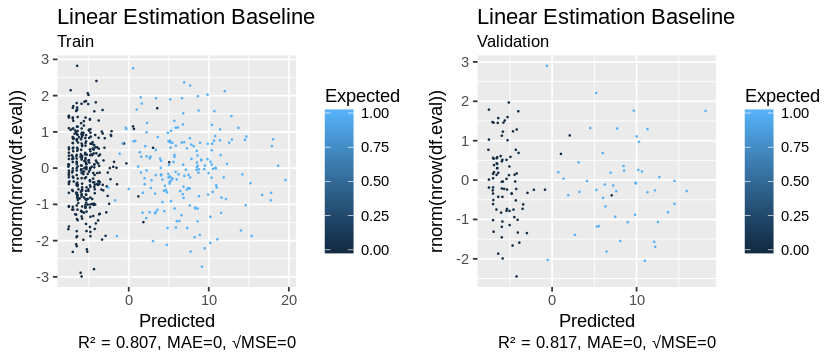

In [21]:
test.formula(
    "Linear Estimation Baseline",
    bah = formula
)